<a href="https://colab.research.google.com/github/huyen1607/Korea-low-fertility-rate-EDA/blob/main/EDA_on_South_Korea's_low_fertility_rate_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 합계 출산율
2. 지역별
3. 학력별
4. 원인: 사회에 대한 막막함:  취업자 증가, 성별 및 연령별 고용율, 스트레스 원인

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!pip install --upgrade --force-reinstall xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 2.0 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.2.0
    Uninstalling xlrd-1.2.0:
      Successfully uninstalled xlrd-1.2.0


In [ ]:
dataframe1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/songdo/출산율.xls',index_col= 0)
dataframe1 = dataframe1.T
dataframe1

,출생아 수 (천명),합계 출산율 (가임여자 1명당 명)
2012,484.6,1.297
2013,436.5,1.187
2014,435.4,1.205
2015,438.4,1.239
2016,406.2,1.172
2017,357.8,1.052
2018,326.8,0.977
2019,302.7,0.918
2020,272.3,0.840
2021,260.6,0.810


In [ ]:
dataframe1.insert(2, "저녀 양육비용(억원)", [3.09, None, None, None,None, 3.97, None, None, None,None], True)
dataframe1

,출생아 수 (천명),합계 출산율 (가임여자 1명당 명),저녀 양육비용(억원)
2012,484.6,1.297,3.09
2013,436.5,1.187,NaN
2014,435.4,1.205,NaN
2015,438.4,1.239,NaN
2016,406.2,1.172,NaN
2017,357.8,1.052,3.97
2018,326.8,0.977,NaN
2019,302.7,0.918,NaN
2020,272.3,0.840,NaN
2021,260.6,0.810,NaN


In [ ]:
gni = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/songdo/GNI.xlsx',index_col= 0)
gni = gni.T
gni

,1인당 실질 국민총소득(만 원),실질소득 전년 대비 증가율(%),1인당 명목 국민총소득(만 원),전년 대비 증가율(%)
2012,2900.0,2.4,2899.0,3.6
2013,2998.0,3.4,2995.0,3.3
2014,3083.0,2.8,3095.0,3.3
2015,3260.0,5.8,3260.0,5.3
2016,3391.0,4.0,3411.0,4.6
2017,3493.0,3.0,3589.0,5.2
2018,3532.0,1.1,3693.0,2.9
2019,3532.0,0.0,3754.0,1.6
2020,3530.0,-0.1,3777.0,0.6
2021,3656.0,3.6,4048.0,7.2


In [ ]:
gni.reset_index(drop=True)

,1인당 실질 국민총소득(만 원),실질소득 전년 대비 증가율(%),1인당 명목 국민총소득(만 원),전년 대비 증가율(%)
0,2900.0,2.4,2899.0,3.6
1,2998.0,3.4,2995.0,3.3
2,3083.0,2.8,3095.0,3.3
3,3260.0,5.8,3260.0,5.3
4,3391.0,4.0,3411.0,4.6
5,3493.0,3.0,3589.0,5.2
6,3532.0,1.1,3693.0,2.9
7,3532.0,0.0,3754.0,1.6
8,3530.0,-0.1,3777.0,0.6
9,3656.0,3.6,4048.0,7.2


In [ ]:
gni.insert(0, 'Year', [2012,2013,2014,2015,2016,2017,2018,2019,2020,2021], True)

In [ ]:
print(gni.columns.tolist())

['Year', '1인당\xa0실질\xa0국민총소득(만\xa0원)', '실질소득 전년\xa0대비\xa0증가율(%)', '1인당\xa0명목\xa0국민총소득(만\xa0원)', '전년\xa0대비\xa0증가율(%)']


In [ ]:
dataframe1.insert(3, '1인당 실질 국민총소득(만 원)', gni['1인당\xa0실질\xa0국민총소득(만\xa0원)'], True )
dataframe1

,출생아 수 (천명),합계 출산율 (가임여자 1명당 명),저녀 양육비용(억원),1인당 실질 국민총소득(만 원)
2012,484.6,1.297,3.09,2900.0
2013,436.5,1.187,NaN,2998.0
2014,435.4,1.205,NaN,3083.0
2015,438.4,1.239,NaN,3260.0
2016,406.2,1.172,NaN,3391.0
2017,357.8,1.052,3.97,3493.0
2018,326.8,0.977,NaN,3532.0
2019,302.7,0.918,NaN,3532.0
2020,272.3,0.840,NaN,3530.0
2021,260.6,0.810,NaN,3656.0


In [ ]:
unemployment = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/songdo/실업률.xls',index_col= 0)
unemployment = unemployment.T
unemployment

,취업자 증감,- 농림어업,- 제조업,- 건설업,실업자 (만명),실업률(%),청년실업자,청년실업률(%)
2012,42.8,-3.2,1.4,2.5,82.6,3.2,31.2,7.5
2013,34.5,-1.7,7.0,-1.7,80.8,3.1,32.4,8.0
2014,59.8,-6.7,15.2,4.9,93.9,3.5,37.8,9.0
2015,28.1,-10.9,14.6,2.5,97.6,3.6,38.9,9.1
2016,23.1,-6.5,-2.1,1.5,100.9,3.7,42.6,9.8
2017,31.6,0.6,-1.8,11.9,102.3,3.7,42.6,9.8
2018,9.7,6.2,-5.6,4.7,107.3,3.8,40.8,9.5
2019,30.1,5.5,-8.1,-1.5,106.3,3.8,38.6,8.9
2020,-21.8,5.0,-5.3,-0.4,110.8,4.0,37.0,9.0
2021,36.9,1.3,-0.8,7.4,103.7,3.7,32.6,7.8


In [ ]:
print(unemployment.columns.tolist())

['취업자\xa0증감', '-\xa0농림어업', '-\xa0제조업', '-\xa0건설업', '실업자 (만명)', '실업률(%)', '청년실업자', '청년실업률(%)']


In [ ]:
dataframe1.insert(4, '실업률(%)', unemployment['실업률(%)'], True )
dataframe1

,출생아 수 (천명),합계 출산율 (가임여자 1명당 명),저녀 양육비용(억원),1인당 실질 국민총소득(만 원),실업률(%)
2012,484.6,1.297,3.09,2900.0,3.2
2013,436.5,1.187,NaN,2998.0,3.1
2014,435.4,1.205,NaN,3083.0,3.5
2015,438.4,1.239,NaN,3260.0,3.6
2016,406.2,1.172,NaN,3391.0,3.7
2017,357.8,1.052,3.97,3493.0,3.7
2018,326.8,0.977,NaN,3532.0,3.8
2019,302.7,0.918,NaN,3532.0,3.8
2020,272.3,0.840,NaN,3530.0,4.0
2021,260.6,0.810,NaN,3656.0,3.7


In [ ]:
dataframe1.insert(5, '청년실업률(%)', unemployment['청년실업률(%)'], True )
dataframe1

,출생아 수 (천명),합계 출산율 (가임여자 1명당 명),저녀 양육비용(억원),1인당 실질 국민총소득(만 원),실업률(%),청년실업률(%)
2012,484.6,1.297,3.09,2900.0,3.2,7.5
2013,436.5,1.187,NaN,2998.0,3.1,8.0
2014,435.4,1.205,NaN,3083.0,3.5,9.0
2015,438.4,1.239,NaN,3260.0,3.6,9.1
2016,406.2,1.172,NaN,3391.0,3.7,9.8
2017,357.8,1.052,3.97,3493.0,3.7,9.8
2018,326.8,0.977,NaN,3532.0,3.8,9.5
2019,302.7,0.918,NaN,3532.0,3.8,8.9
2020,272.3,0.840,NaN,3530.0,4.0,9.0
2021,260.6,0.810,NaN,3656.0,3.7,7.8


In [ ]:
dataframe1.insert(6, '여성고용률(%)', [53.5,54.0,55.0,55.7,56.1,56.9,57.2,57.8,56.7,57.7], True )
dataframe1

,출생아 수 (천명),합계 출산율 (가임여자 1명당 명),저녀 양육비용(억원),1인당 실질 국민총소득(만 원),실업률(%),청년실업률(%),여성고용률(%)
2012,484.6,1.297,3.09,2900.0,3.2,7.5,53.5
2013,436.5,1.187,NaN,2998.0,3.1,8.0,54.0
2014,435.4,1.205,NaN,3083.0,3.5,9.0,55.0
2015,438.4,1.239,NaN,3260.0,3.6,9.1,55.7
2016,406.2,1.172,NaN,3391.0,3.7,9.8,56.1
2017,357.8,1.052,3.97,3493.0,3.7,9.8,56.9
2018,326.8,0.977,NaN,3532.0,3.8,9.5,57.2
2019,302.7,0.918,NaN,3532.0,3.8,8.9,57.8
2020,272.3,0.840,NaN,3530.0,4.0,9.0,56.7
2021,260.6,0.810,NaN,3656.0,3.7,7.8,57.7


In [ ]:
dataframe1.insert(7, '20-29세세 고용률(%)', [58.2,56.8,57.4,57.9,58.2,57.6,57.9,58.2,55.7,57.4], True )
dataframe1.insert(8, '30-39세세 고용률(%)', [72.8,73.3,74.1,74.4,74.7,75.3,75.7,76.0,75.3,75.3], True )
dataframe1

,출생아 수 (천명),합계 출산율 (가임여자 1명당 명),저녀 양육비용(억원),1인당 실질 국민총소득(만 원),실업률(%),청년실업률(%),여성고용률(%),20-29세세 고용률(%),30-39세세 고용률(%)
2012,484.6,1.297,3.09,2900.0,3.2,7.5,53.5,58.2,72.8
2013,436.5,1.187,NaN,2998.0,3.1,8.0,54.0,56.8,73.3
2014,435.4,1.205,NaN,3083.0,3.5,9.0,55.0,57.4,74.1
2015,438.4,1.239,NaN,3260.0,3.6,9.1,55.7,57.9,74.4
2016,406.2,1.172,NaN,3391.0,3.7,9.8,56.1,58.2,74.7
2017,357.8,1.052,3.97,3493.0,3.7,9.8,56.9,57.6,75.3
2018,326.8,0.977,NaN,3532.0,3.8,9.5,57.2,57.9,75.7
2019,302.7,0.918,NaN,3532.0,3.8,8.9,57.8,58.2,76.0
2020,272.3,0.840,NaN,3530.0,4.0,9.0,56.7,55.7,75.3
2021,260.6,0.810,NaN,3656.0,3.7,7.8,57.7,57.4,75.3


In [ ]:
employment = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/songdo/고용률.xls', index_col=0)
employment = employment.T
employment

,전체,성,NaN,연령집단,NaN,NaN,NaN,NaN,NaN
Unnamed: 1,NaN,남성,여성,15-19세,20-29세,30-39세,40-49세,50-59세,60-64세
2012,64.3,75.1,53.5,7.0,58.2,72.8,78.3,72.3,56.3
2013,64.6,75.2,54.0,6.9,56.8,73.3,78.4,73.2,57.4
2014,65.6,76.0,55.0,7.7,57.4,74.1,79.1,74.2,58.5
2015,65.9,75.9,55.7,7.8,57.9,74.4,79.1,74.4,59.6
2016,66.1,75.9,56.1,8.0,58.2,74.7,79.3,74.3,59.7
2017,66.6,76.3,56.9,8.4,57.6,75.3,79.4,75.3,60.6
2018,66.6,75.9,57.2,7.4,57.9,75.7,79.0,75.2,59.4
2019,66.8,75.7,57.8,7.6,58.2,76.0,78.4,75.4,59.8
2020,65.9,74.8,56.7,6.6,55.7,75.3,77.1,74.3,60.4


In [ ]:
eco_attendance = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/songdo/경제참여.xlsx', index_col=0)
eco_attendance = eco_attendance.T
eco_attendance

,15세이상 여성인구 (천명),여성경제 활동인구 (천명),여성경제 활동참가율(%)
2012,21356.0,10704.0,50.1
2013,21576.0,10862.0,50.3
2014,21806.0,11229.0,51.5
2015,22018.0,11426.0,51.9
2016,22205.0,11583.0,52.2
2017,22357.0,11773.0,52.7
2018,22484.0,11893.0,52.9
2019,22618.0,12097.0,53.5
2020,22750.0,12007.0,52.8
2021,22882.0,12186.0,53.3


In [ ]:
dataframe2 = pd.concat([dataframe1, eco_attendance], axis=1)
dataframe2

,출생아 수 (천명),합계 출산율 (가임여자 1명당 명),저녀 양육비용(억원),1인당 실질 국민총소득(만 원),실업률(%),청년실업률(%),여성고용률(%),20-29세세 고용률(%),30-39세세 고용률(%),15세이상 여성인구 (천명),여성경제 활동인구 (천명),여성경제 활동참가율(%)
2012,484.6,1.297,3.09,2900.0,3.2,7.5,53.5,58.2,72.8,21356.0,10704.0,50.1
2013,436.5,1.187,NaN,2998.0,3.1,8.0,54.0,56.8,73.3,21576.0,10862.0,50.3
2014,435.4,1.205,NaN,3083.0,3.5,9.0,55.0,57.4,74.1,21806.0,11229.0,51.5
2015,438.4,1.239,NaN,3260.0,3.6,9.1,55.7,57.9,74.4,22018.0,11426.0,51.9
2016,406.2,1.172,NaN,3391.0,3.7,9.8,56.1,58.2,74.7,22205.0,11583.0,52.2
2017,357.8,1.052,3.97,3493.0,3.7,9.8,56.9,57.6,75.3,22357.0,11773.0,52.7
2018,326.8,0.977,NaN,3532.0,3.8,9.5,57.2,57.9,75.7,22484.0,11893.0,52.9
2019,302.7,0.918,NaN,3532.0,3.8,8.9,57.8,58.2,76.0,22618.0,12097.0,53.5
2020,272.3,0.840,NaN,3530.0,4.0,9.0,56.7,55.7,75.3,22750.0,12007.0,52.8
2021,260.6,0.810,NaN,3656.0,3.7,7.8,57.7,57.4,75.3,22882.0,12186.0,53.3


In [ ]:
marriage = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/songdo/marriage.xls', index_col=0)
marriage = marriage.T
dataframe3 = pd.concat([dataframe2, marriage], axis=1)
dataframe3

,출생아 수 (천명),합계 출산율 (가임여자 1명당 명),저녀 양육비용(억원),1인당 실질 국민총소득(만 원),실업률(%),청년실업률(%),여성고용률(%),20-29세세 고용률(%),30-39세세 고용률(%),15세이상 여성인구 (천명),여성경제 활동인구 (천명),여성경제 활동참가율(%),총혼인건수(천건),증감건수(천건),증감률(%),조혼인율(인구 1천명당 건)
2012,484.6,1.297,3.09,2900.0,3.2,7.5,53.5,58.2,72.8,21356.0,10704.0,50.1,327.1,-20.0,-0.6,6.5
2013,436.5,1.187,NaN,2998.0,3.1,8.0,54.0,56.8,73.3,21576.0,10862.0,50.3,322.8,-4.3,-1.3,6.4
2014,435.4,1.205,NaN,3083.0,3.5,9.0,55.0,57.4,74.1,21806.0,11229.0,51.5,305.5,-17.3,-5.4,6.0
2015,438.4,1.239,NaN,3260.0,3.6,9.1,55.7,57.9,74.4,22018.0,11426.0,51.9,302.8,-2.7,-0.9,5.9
2016,406.2,1.172,NaN,3391.0,3.7,9.8,56.1,58.2,74.7,22205.0,11583.0,52.2,281.6,-21.2,-7.0,5.5
2017,357.8,1.052,3.97,3493.0,3.7,9.8,56.9,57.6,75.3,22357.0,11773.0,52.7,264.5,-17.2,-6.1,5.2
2018,326.8,0.977,NaN,3532.0,3.8,9.5,57.2,57.9,75.7,22484.0,11893.0,52.9,257.6,-6.8,-2.6,5.0
2019,302.7,0.918,NaN,3532.0,3.8,8.9,57.8,58.2,76.0,22618.0,12097.0,53.5,239.2,-18.5,-7.2,4.7
2020,272.3,0.840,NaN,3530.0,4.0,9.0,56.7,55.7,75.3,22750.0,12007.0,52.8,213.5,-25.7,-10.7,4.2
2021,260.6,0.810,NaN,3656.0,3.7,7.8,57.7,57.4,75.3,22882.0,12186.0,53.3,192.5,-21.0,-9.8,3.8


In [ ]:
#dataframe3.rename(columns = {'증감률(%)', '종혼인건수 증감률(%)'}, inplace = True)
dataframe3.rename({'증감률(%)': '종혼인건수 증감률(%)'}, axis=1, inplace=True)

In [ ]:
dataframe3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 2012 to 2021
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   출생아 수 (천명)           10 non-null     float64
 1   합계 출산율 (가임여자 1명당 명)  10 non-null     float64
 2   저녀 양육비용(억원)          2 non-null      float64
 3   1인당 실질 국민총소득(만 원)    10 non-null     float64
 4   실업률(%)               10 non-null     float64
 5   청년실업률(%)             10 non-null     float64
 6   여성고용률(%)             10 non-null     float64
 7   20-29세세 고용률(%)       10 non-null     float64
 8   30-39세세 고용률(%)       10 non-null     float64
 9   15세이상 여성인구 (천명)      10 non-null     float64
 10  여성경제 활동인구 (천명)       10 non-null     float64
 11  여성경제 활동참가율(%)        10 non-null     float64
 12  총혼인건수(천건)            10 non-null     float64
 13  증감건수(천건)             10 non-null     float64
 14  종혼인건수 증감률(%)         10 non-null     float64
 15  조혼인율(인구 1천명당 건)      10 non-null     float

In [ ]:
dataframe3.isna().sum()

출생아 수 (천명)             0
합계 출산율 (가임여자 1명당 명)    0
저녀 양육비용(억원)            8
1인당 실질 국민총소득(만 원)      0
실업률(%)                 0
청년실업률(%)               0
여성고용률(%)               0
20-29세세 고용률(%)         0
30-39세세 고용률(%)         0
15세이상 여성인구 (천명)        0
여성경제 활동인구 (천명)         0
여성경제 활동참가율(%)          0
총혼인건수(천건)              0
증감건수(천건)               0
종혼인건수 증감률(%)           0
조혼인율(인구 1천명당 건)        0
dtype: int64

In [ ]:
print(dataframe3.columns.tolist())

['출생아\xa0수 (천명)', '합계\xa0출산율 (가임여자 1명당 명)', '저녀 양육비용(억원)', '1인당 실질 국민총소득(만 원)', '실업률(%)', '청년실업률(%)', '여성고용률(%)', '20-29세세 고용률(%)', '30-39세세 고용률(%)', '15세이상\xa0여성인구 (천명)', '여성경제\xa0활동인구 (천명)', '여성경제\xa0활동참가율(%)', '총혼인건수(천건)', '증감건수(천건)', '종혼인건수 증감률(%)', '조혼인율(인구\xa01천명당\xa0건)']


In [ ]:
dataframe3 = dataframe3.drop('저녀 양육비용(억원)', axis = 1)

In [ ]:
!sudo apt-get install fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_

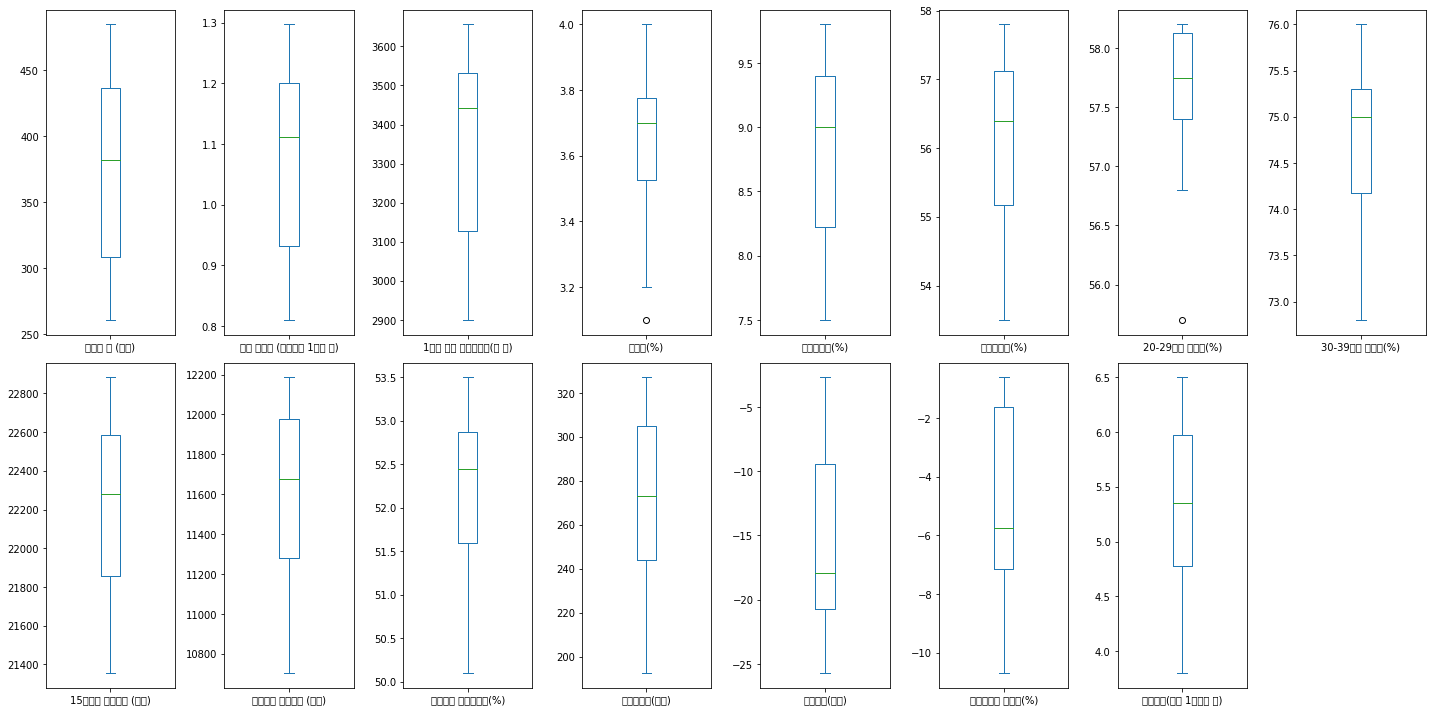

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc
dataframe3.plot(kind='box',subplots=True,layout=(2,len(dataframe3.columns)//2+1),figsize=(20,10))
path='/content/drive/MyDrive/Colab Notebooks/data_in (1)/malgun.ttf'
#font_name =fm.FontProperties(fname=font_path).get_name()
#rc('font',family='NanumBarunGothic')
#path =  '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path).get_name()
plt.rc('font',family=fontprop)
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib
print( matplotlib.matplotlib_fname() )

/usr/local/lib/python3.8/dist-packages/matplotlib/mpl-data/matplotlibrc


In [ ]:
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

In [ ]:
print(len(font_list))

27


In [ ]:
font_list

['/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf',
 '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR

In [ ]:
path =  '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이', fontproperties=fontprop)
plt.ylabel('주식 가격', fontproperties=fontprop)
plt.xlabel('시간(분)', fontproperties=fontprop)
plt.show()

[]

In [ ]:
font_list_mac = fm.OSXInstalledFonts()
print(len(font_list_mac))

0


<ipython-input-42-ff4abd6ee65c>:1: MatplotlibDeprecationWarning: 
The OSXInstalledFonts function was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  font_list_mac = fm.OSXInstalledFonts()


In [ ]:
dataframe3.corr(method = 'pearson')

,출생아 수 (천명),합계 출산율 (가임여자 1명당 명),1인당 실질 국민총소득(만 원),실업률(%),청년실업률(%),여성고용률(%),20-29세세 고용률(%),30-39세세 고용률(%),15세이상 여성인구 (천명),여성경제 활동인구 (천명),여성경제 활동참가율(%),총혼인건수(천건),증감건수(천건),종혼인건수 증감률(%),조혼인율(인구 1천명당 건)
출생아 수 (천명),1.000000,0.994791,-0.913425,-0.793134,-0.160101,-0.886797,0.360257,-0.855754,-0.960589,-0.932675,-0.877810,0.977232,0.395398,0.798123,0.977094
합계 출산율 (가임여자 1명당 명),0.994791,1.000000,-0.869356,-0.738315,-0.072640,-0.840960,0.402786,-0.805905,-0.928758,-0.893274,-0.829520,0.968779,0.406895,0.789518,0.964717
1인당 실질 국민총소득(만 원),-0.913425,-0.869356,1.000000,0.884932,0.442192,0.977883,-0.100218,0.946716,0.981091,0.984540,0.968745,-0.913931,-0.295952,-0.723493,-0.927737
실업률(%),-0.793134,-0.738315,0.884932,1.000000,0.608714,0.869897,-0.180664,0.901411,0.893005,0.907010,0.907814,-0.800723,-0.397272,-0.720777,-0.821518
청년실업률(%),-0.160101,-0.072640,0.442192,0.608714,1.000000,0.454593,0.109061,0.566271,0.345328,0.409141,0.484001,-0.116953,0.037902,-0.202303,-0.152405
여성고용률(%),-0.886797,-0.840960,0.977883,0.869897,0.454593,1.000000,0.007754,0.979343,0.958381,0.985784,0.993788,-0.874804,-0.250099,-0.678674,-0.890319
20-29세세 고용률(%),0.360257,0.402786,-0.100218,-0.180664,0.109061,0.007754,1.000000,-0.024033,-0.228337,-0.125688,-0.013918,0.318335,0.186078,0.419543,0.304003
30-39세세 고용률(%),-0.855754,-0.805905,0.946716,0.901411,0.566271,0.979343,-0.024033,1.000000,0.926006,0.962340,0.980531,-0.814006,-0.208392,-0.637973,-0.833174
15세이상 여성인구 (천명),-0.960589,-0.928758,0.981091,0.893005,0.345328,0.958381,-0.228337,0.926006,1.000000,0.990615,0.959408,-0.963713,-0.363983,-0.798338,-0.973465
여성경제 활동인구 (천명),-0.932675,-0.893274,0.984540,0.907010,0.409141,0.985784,-0.125688,0.962340,0.990615,1.000000,0.988800,-0.931450,-0.334654,-0.762836,-0.944412


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52380 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0,

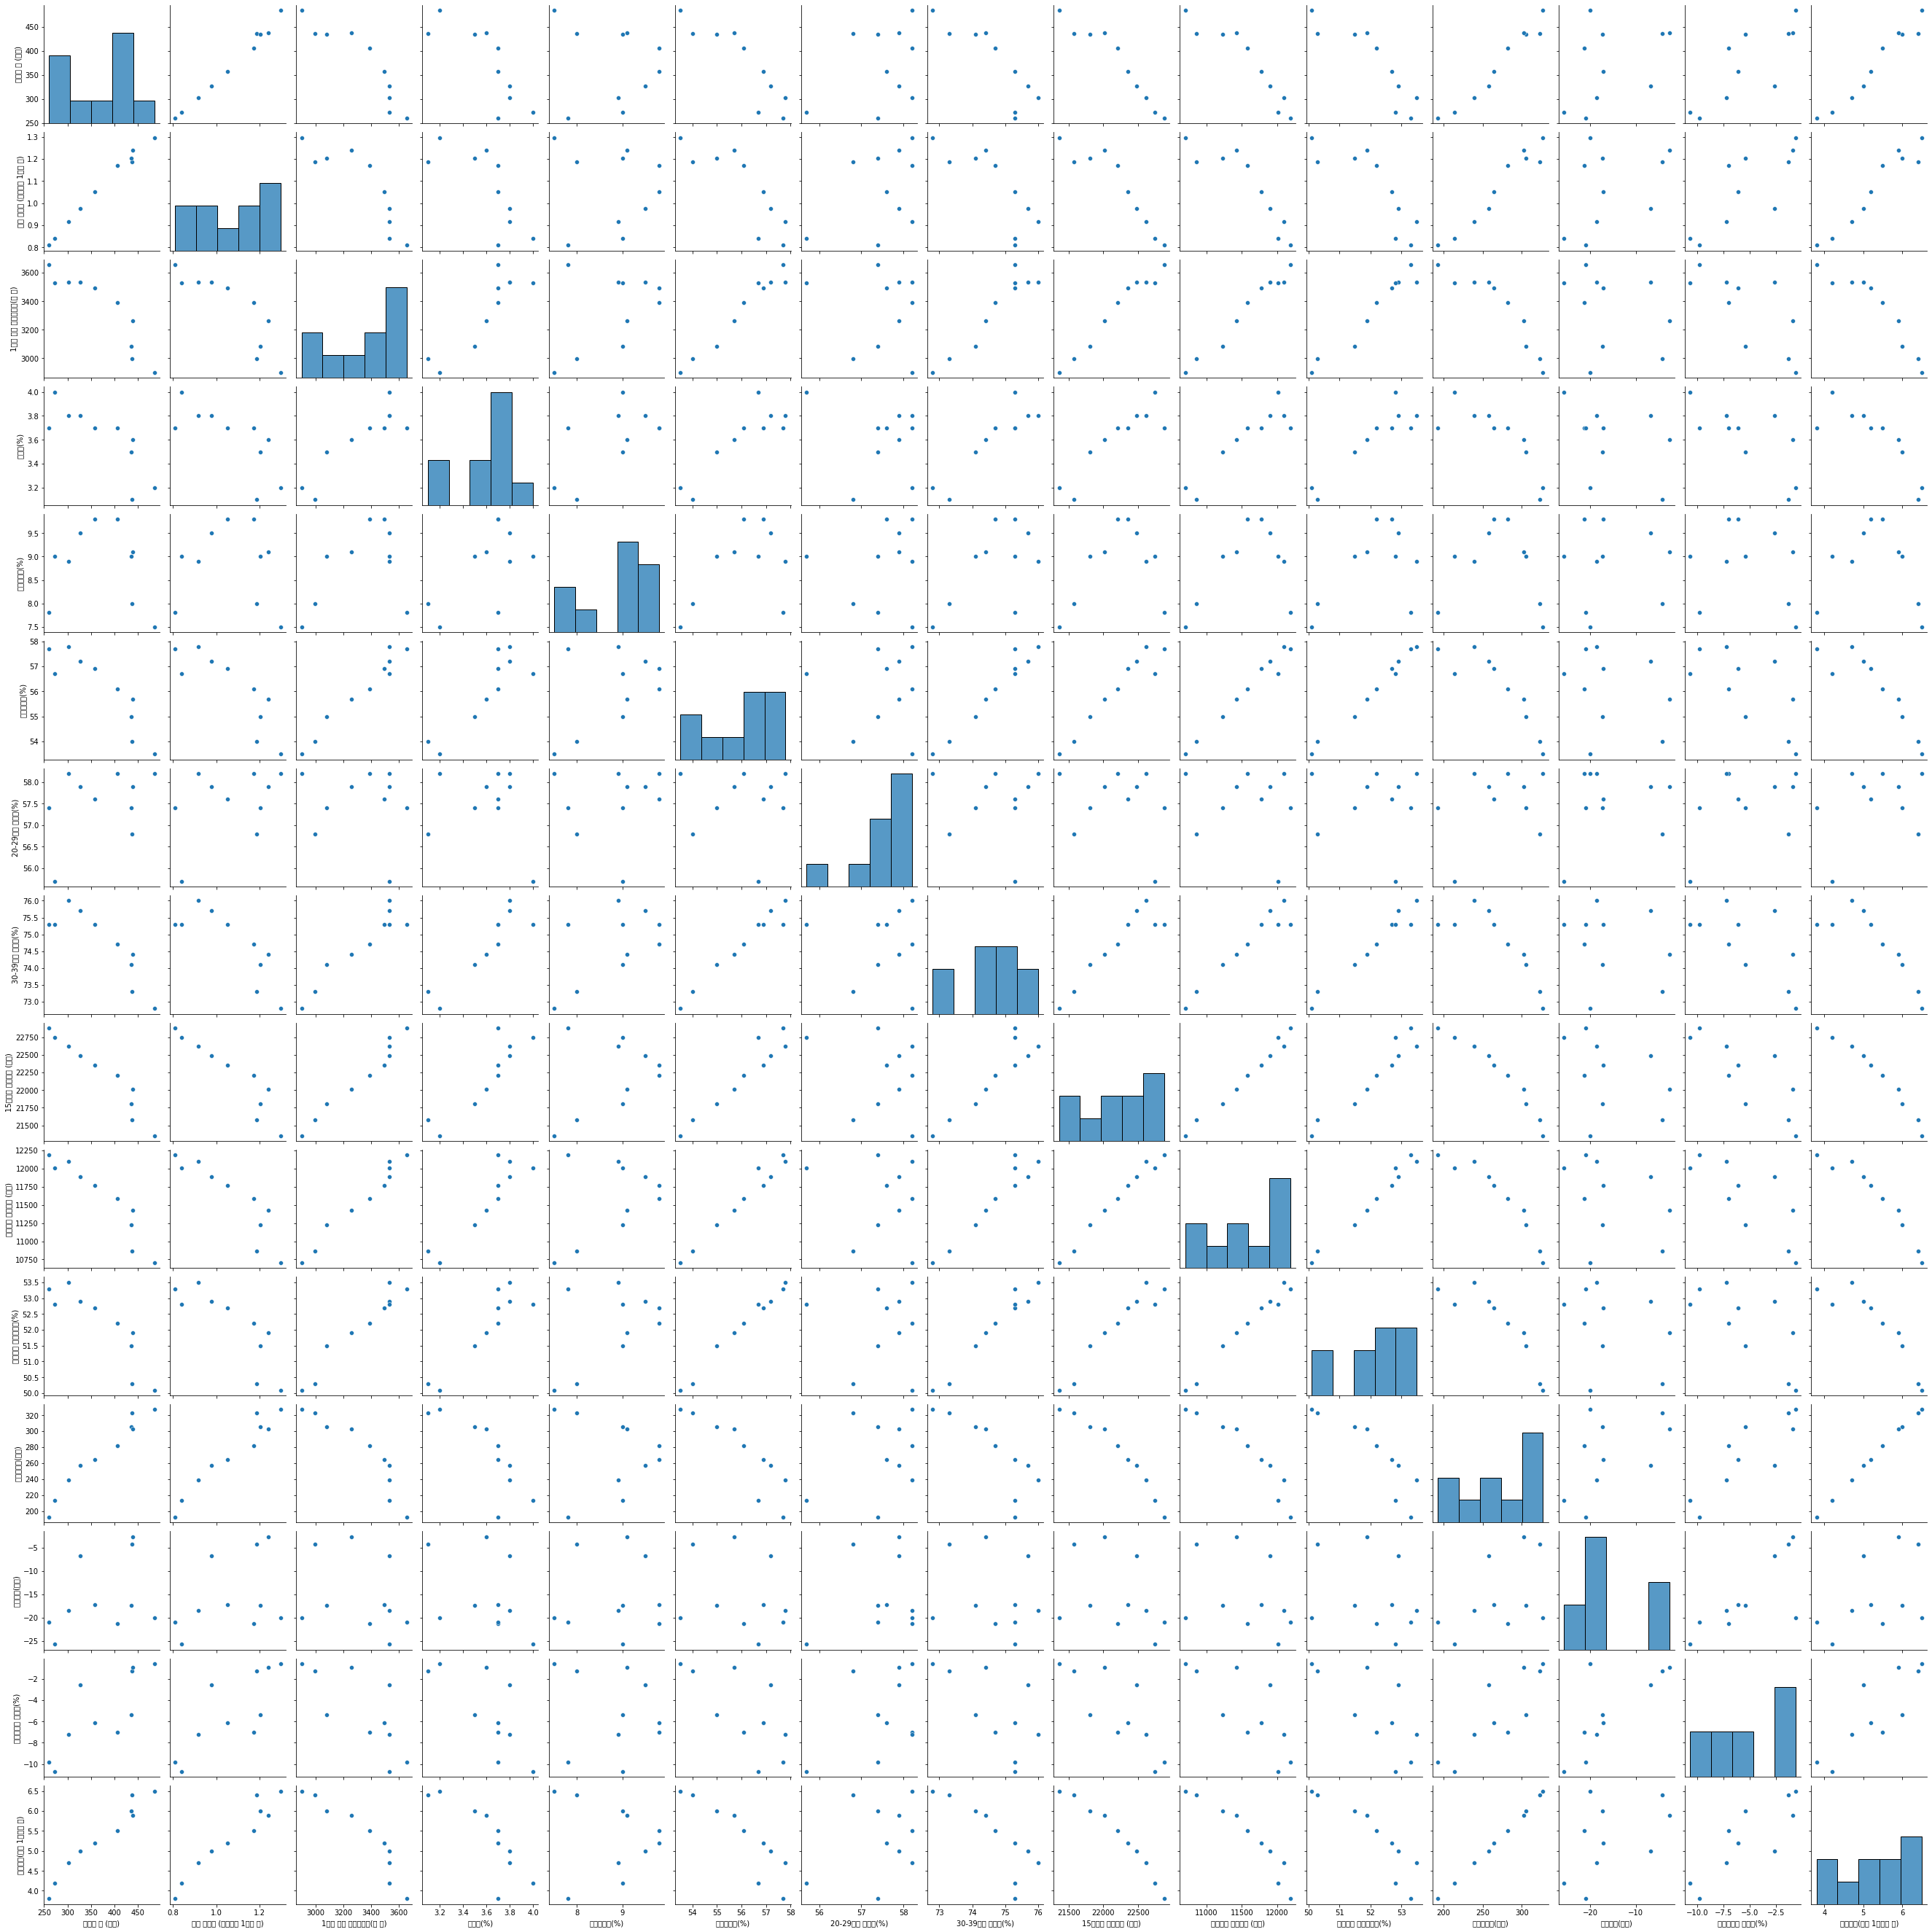

In [ ]:
import seaborn as sns
sns.pairplot(dataframe3)

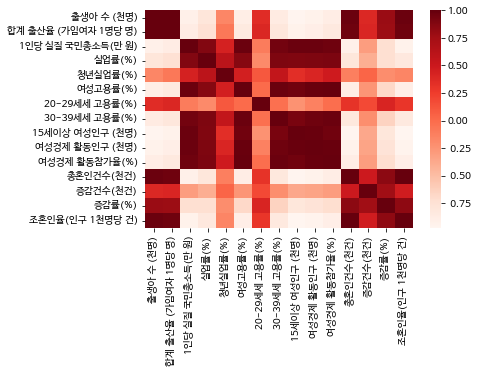

In [ ]:
sns.heatmap(dataframe3.corr(), cmap = 'Reds')

Are there any relationships between 저출산 and 지역?

In [ ]:
X = dataframe3.drop(columns=['출생아\xa0수 (천명)', '합계\xa0출산율 (가임여자 1명당 명)','1인당 실질 국민총소득(만 원)','조혼인율(인구\xa01천명당\xa0건)','15세이상\xa0여성인구 (천명)','여성경제\xa0활동인구 (천명)','총혼인건수(천건)', '증감건수(천건)'])
X.insert(7, '실질소득 전년 대비 증가율(%)',gni['실질소득 전년\xa0대비\xa0증가율(%)'], True)
y = dataframe3['합계\xa0출산율 (가임여자 1명당 명)']
X

,실업률(%),청년실업률(%),여성고용률(%),20-29세세 고용률(%),30-39세세 고용률(%),여성경제 활동참가율(%),종혼인건수 증감률(%),실질소득 전년 대비 증가율(%)
2012,3.2,7.5,53.5,58.2,72.8,50.1,-0.6,2.4
2013,3.1,8.0,54.0,56.8,73.3,50.3,-1.3,3.4
2014,3.5,9.0,55.0,57.4,74.1,51.5,-5.4,2.8
2015,3.6,9.1,55.7,57.9,74.4,51.9,-0.9,5.8
2016,3.7,9.8,56.1,58.2,74.7,52.2,-7.0,4.0
2017,3.7,9.8,56.9,57.6,75.3,52.7,-6.1,3.0
2018,3.8,9.5,57.2,57.9,75.7,52.9,-2.6,1.1
2019,3.8,8.9,57.8,58.2,76.0,53.5,-7.2,0.0
2020,4.0,9.0,56.7,55.7,75.3,52.8,-10.7,-0.1
2021,3.7,7.8,57.7,57.4,75.3,53.3,-9.8,3.6


In [ ]:
import statsmodels.api as sm

# add_constant를 통해 상수항 생성
X_c = sm.add_constant(X)

# 모델 형성 및 결과 출력
model = sm.OLS(y, X_c).fit()
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     합계 출산율 (가임여자 1명당 명)   R-squared:                       0.997
Model:                             OLS   Adj. R-squared:                  0.974
Method:                  Least Squares   F-statistic:                     43.91
Date:                 Sun, 11 Dec 2022   Prob (F-statistic):              0.116
Time:                         00:33:01   Log-Likelihood:                 33.101
No. Observations:                   10   AIC:                            -48.20
Df Residuals:                        1   BIC:                            -45.48
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0919

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
dataframe_investment = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/songdo/출산율 대책 및 예산 추이.xlsx', index_col=0)
dataframe_investment

,아동양육가구 지원 예산,"산모, 신생아 지원 예산",영유아 지원 예산,여유아 외 아동.청소년 지원 예산,청년 - 신혼부부 지원 예산,여성지원 예산,직장 문화-제도-환경 조정 예산,사회 인식개선 홍보 및 교육 예산
2006,1565.0,402.0,7892.0,397.0,NaN,NaN,14.0,5.0
2007,2069.0,449.0,10719.0,2074.0,NaN,8.0,29.0,5.0
2008,2461.0,635.0,11825.0,1456.0,NaN,9.0,195.0,6.0
2009,3808.0,815.0,14276.0,2307.0,2.0,55.0,229.0,2.0
2010,3936.0,885.0,18302.0,2149.0,NaN,NaN,259.0,7.0
2011,4193.0,838.0,25166.0,5291.0,5.0,62.0,98.0,NaN
2012,6216.0,882.0,30017.0,5829.0,NaN,NaN,193.0,5.0
2013,6664.0,952.0,40240.0,7128.0,NaN,NaN,334.0,NaN
2014,8418.0,1007.0,46863.0,8153.0,4294.0,NaN,717.0,NaN
2015,8942.0,1156.0,44126.0,9490.0,10454.0,NaN,1283.0,NaN


In [ ]:
print(dataframe_investment.columns.tolist())

['아동양육가구 지원 예산', '산모, 신생아 지원 예산', '영유아 지원 예산', '여유아 외 아동.청소년 지원 예산', '청년 - 신혼부부 지원 예산', '여성지원 예산', '직장 문화-제도-환경 조정 예산', '사회 인식개선 홍보 및 교육 예산']


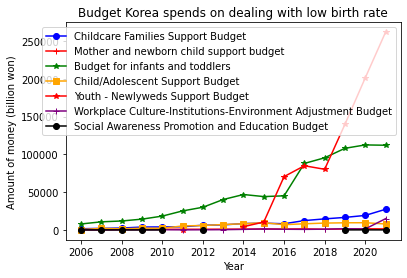

In [ ]:
fig=plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.plot(dataframe_investment['아동양육가구 지원 예산'], marker=r'o', color=u'blue',linestyle='-',label='Childcare Families Support Budget')
ax1.plot(dataframe_investment['산모, 신생아 지원 예산'], marker=r'+', color=u'red',linestyle='-',label='Mother and newborn child support budget')
ax1.plot(dataframe_investment['영유아 지원 예산'], marker=r'*', color=u'green',linestyle='-',label='Budget for infants and toddlers')
ax1.plot(dataframe_investment['여유아 외 아동.청소년 지원 예산'], marker=r's', color=u'orange',linestyle='-',label='Child/Adolescent Support Budget')
ax1.plot(dataframe_investment['청년 - 신혼부부 지원 예산'], marker=r'*', color=u'red',linestyle='-',label='Youth - Newlyweds Support Budget')
ax1.plot(dataframe_investment['직장 문화-제도-환경 조정 예산'], marker=r'+', color=u'purple',linestyle='-',label='Workplace Culture-Institutions-Environment Adjustment Budget')
ax1.plot(dataframe_investment['사회 인식개선 홍보 및 교육 예산'], marker=r'o', color=u'black',linestyle='-',label='Social Awareness Promotion and Education Budget')

ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
ax1.set_title('Line Plots: Markets, Colors,and Linestyle')
plt.xlabel('Year')
plt.ylabel('Amount of money (billion won)')
plt.legend(loc='best')
plt.title('Budget Korea spends on dealing with low birth rate')
plt.savefig('line_plot.png', dpi=400, bbox_inches='tight')
plt.show()

Are there any relationships between 저출산 and 학력별?

In [ ]:
dataframe_education = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/songdo/지역별 출산률.xlsx', index_col=0)
dataframe_education

Are there any relationships between 저출산산 and 소득구간별

In [ ]:
dataframe_income = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/songdo/소득득 구간별.xlsx')#, index_col=0)
dataframe_income

In [ ]:
#예산